In [1]:
%%bash
cat ./assets/nokia/sms.txt

//SCKL1583 0B05041583000000030103013000480E01FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBFFF9FFFFF3FFC71FFFFFFDFFFEFBFFDED0F32
//SCKL1583 0B050415830000000301030273DFFCC18FF8EDB7BDE1DFFB6FB7FB71B7BAEFDFFB6DB7FB7B8F12718FFCF30FF8E3BFFFFFFFFFFFFFFFFF1FFFFFFFFFFFFFFFFF
//SCKL1583 0B0504158300000003010303FFFFFFFC0FFFFC0FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF00

`SCKL1583` is the nbs header

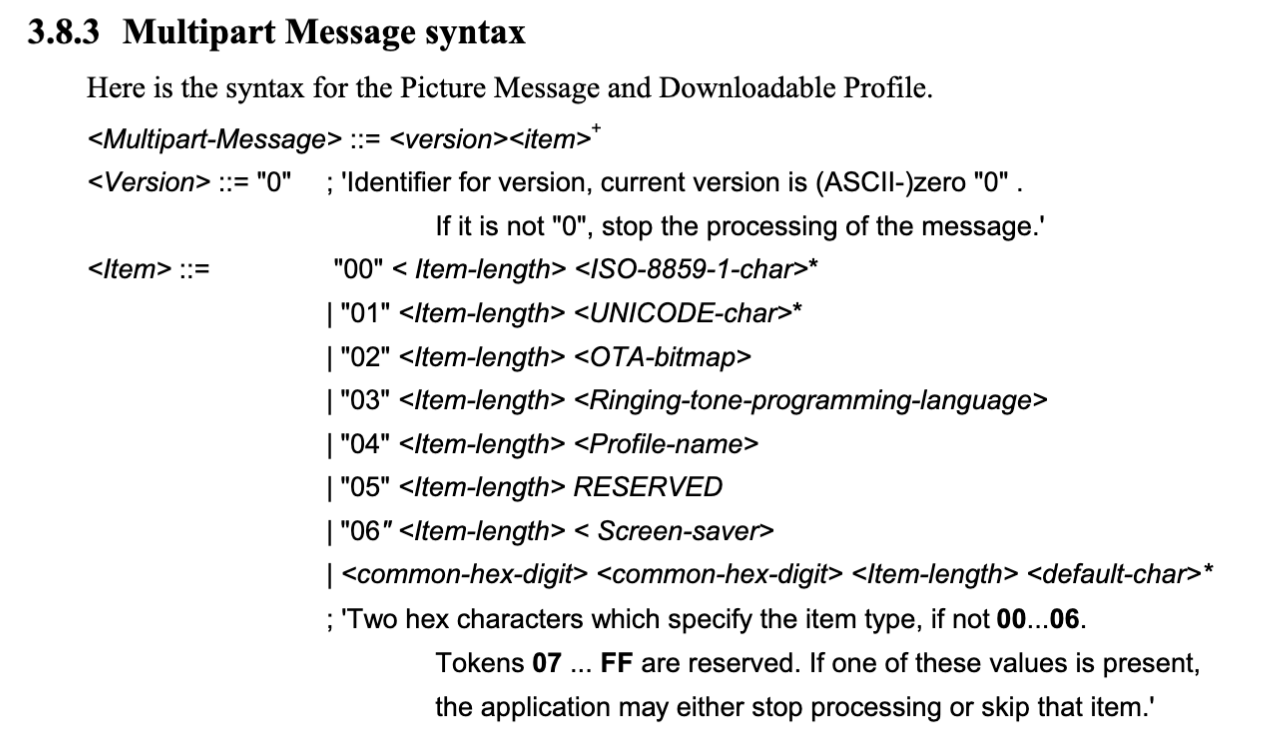

If we look at this definition, we have 

- version 0
- item type B050

However, I think the refers to `The CLI Icon Reader is listening to on NBS port 5507 decimal (1583 hexadecimal)` as `1583` seems to incide the NBS port.

The CLI Icon Reader is listening to on NBS port 5507 decimal (1583 hexadecimal)

In [26]:
hex_data = "3000480E01FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBFFF9FFFFF3FFC71FFFFFFDFFFEFBFFDED0F3273DFFCC18FF8EDB7BDE1DFFB6FB7FB71B7BAEFDFFB6DB7FB7B8F12718FFCF30FF8E3BFFFFFFFFFFFFFFFFF1FFFFFFFFFFFFFFFFFFFFFFFFC0FFFFC0FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF00"

0B0504158300000003010301 3000480E01FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBFFF9FFFFF3FFC71FFFFFFDFFFEFBFFDED0F32 
0B0504158300000003010302 73DFFCC18FF8EDB7BDE1DFFB6FB7FB71B7BAEFDFFB6DB7FB7B8F12718FFCF30FF8E3BFFFFFFFFFFFFFFFFF1FFFFFFFFFFFFFFFFF
0B0504158300000003010303 FFFFFFFC0FFFFC0FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF00

Given this example from wikipedia

```text
 0B 0B is hex for 11. There are 11 more bytes to follow.
 05 This is the code for port addressing.
 04 The next 4 bytes of data belong to this Information Element
 15 82 Send it to Port 1582 (in other words, it is an Operator Logo)
 00 00 It was sent from Port 0000. This is not relevant for most Smart Message types, but must be included nonetheless
 00 This is the code for Concatenation. This content is being sent as multiple SMS messages
 03 Three more bytes of information belong to this Information Element.
 01 Message Reference No. If two or more items are being sent, giving them different reference numbers makes sure the phone knows which SMS messages belong to which Smart Message.
 02 Overall, there are two messages.
 01 This is the first message in the sequence.
```

```hex
0B 0504 1583 0000 00 03 01 03 01
0B 0504 1583 0000 00 03 01 03 02
0B 0504 1583 0000 00 03 01 03 03
   CODE PORT FROM CC          SQ 
```

- Port means functionality, where 1583 revers to `CLI Icon reader` (we saw that at the start of the message)
- CC means concat
- SQ is the sequence number

This is just the header, we can discard them and concat the messages according to this layout:

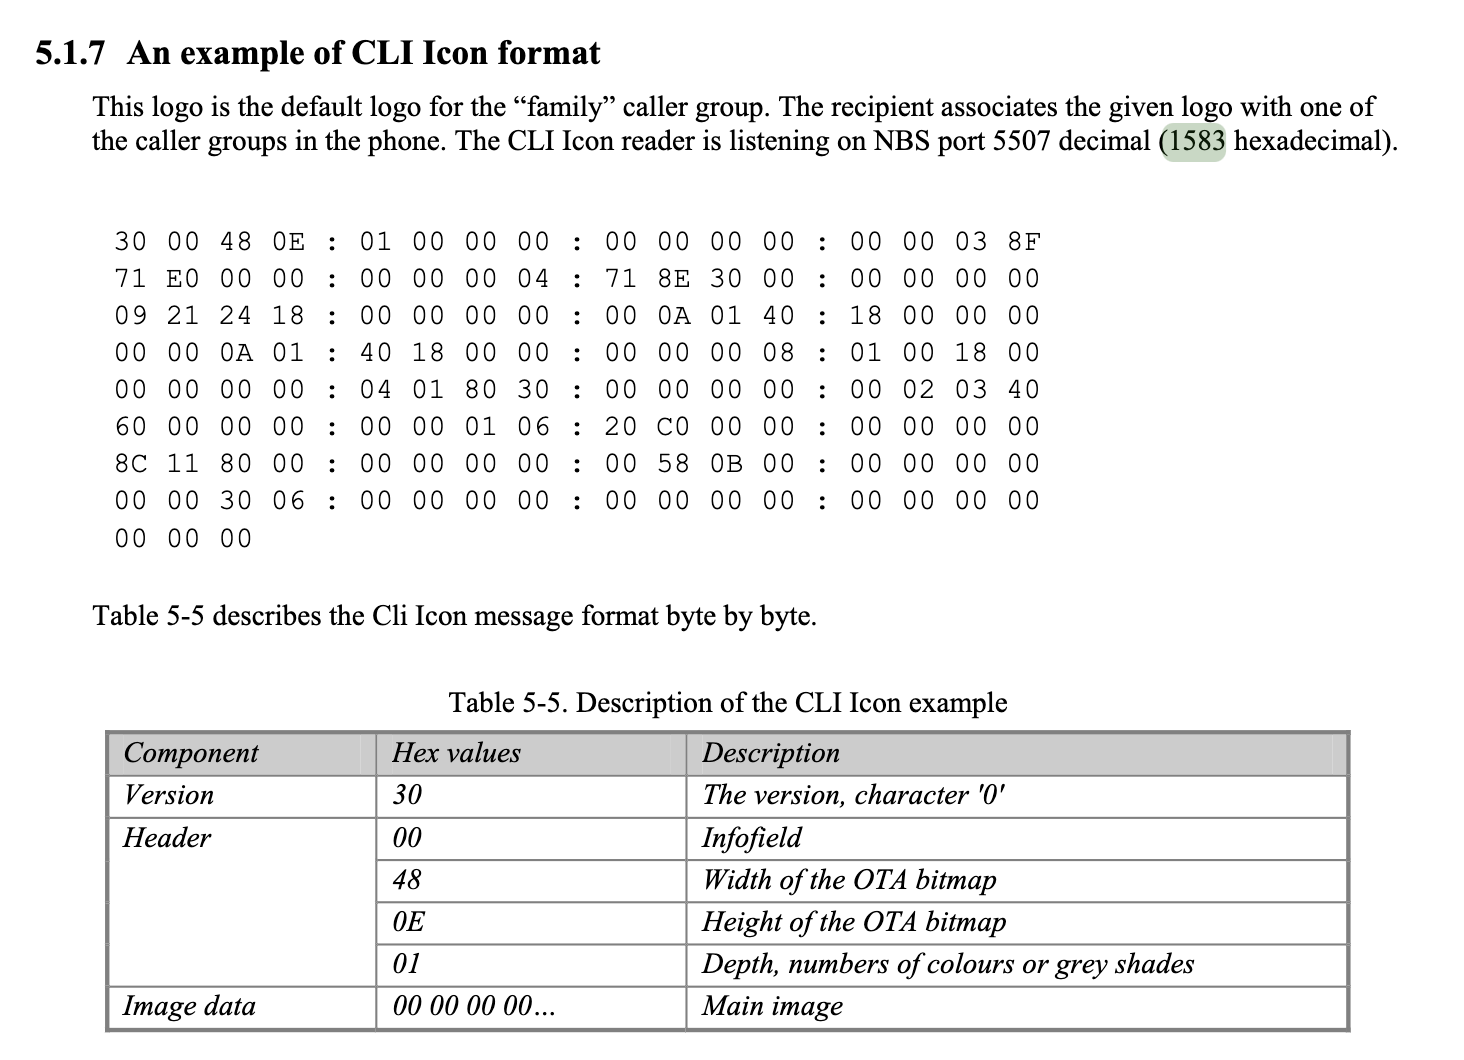

```
30      00   48    0E     01
Version INFO WDITH HEIGHT DEPTH
```


In [42]:
width = 0x48
height = 0x0e
width,height,width*height

(72, 14, 1008)

In [43]:
bin_data = bytes.fromhex(hex_data)
image_data = bin_data[5:-1]
image_data

b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xbf\xff\x9f\xff\xff?\xfcq\xff\xff\xff\xdf\xff\xef\xbf\xfd\xed\x0f2s\xdf\xfc\xc1\x8f\xf8\xed\xb7\xbd\xe1\xdf\xfbo\xb7\xfbq\xb7\xba\xef\xdf\xfbm\xb7\xfb{\x8f\x12q\x8f\xfc\xf3\x0f\xf8\xe3\xbf\xff\xff\xff\xff\xff\xff\xff\xff\x1f\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xfc\x0f\xff\xfc\x0f\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff'

In [47]:
bit_data = bin(int.from_bytes(image_data))[2:]
assert len(bit_data) == width*height, (len(bit_data),width*height)

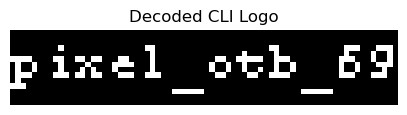

In [40]:
import matplotlib.pyplot as plt
import numpy as np

image_array = np.array([int(bit) for bit in bit_data], dtype=np.uint8).reshape(height, width)

# Display the image
plt.figure(figsize=(5, 2))
plt.imshow(image_array, cmap="gray_r", interpolation="nearest")
plt.axis("off")  # Hide axes
plt.title("Decoded CLI Logo")
plt.show()